### What we do when have asymmetric data?

If the two tables have asymmetric data, which can easily happen when data is entered in different stages, then we would have to use a `LEFT JOIN`, `RIGHT JOIN` or `FULL JOIN` instead to ensure that the data you need is not left out of the results.

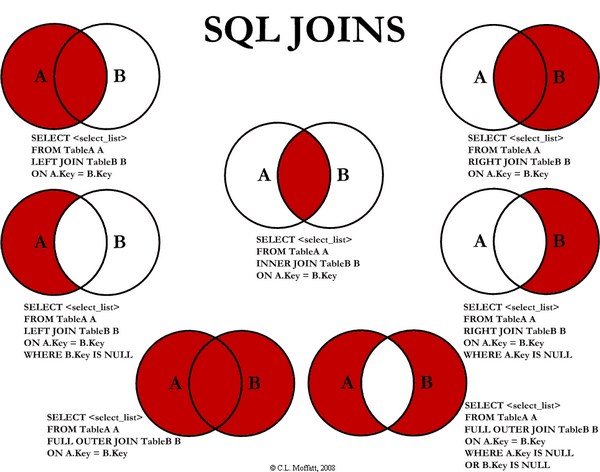

In [11]:
import mysql.connector

mydb = mysql.connector.connect(
    user='root',
    passwd='root',
    host='localhost',
    database='learning_sql_database'
)

print(mydb)

In [12]:
mycursor = mydb.cursor()

mycursor.execute(
"""
CREATE TABLE sql_lesson_buildings(
Building_name VARCHAR(100),
Capacity DOUBLE)
"""
)

In [18]:
sql = "REPLACE INTO sql_lesson_buildings(Building_name, Capacity) VALUES(%s, %s)"
val = [
    ('1e', 24),
    ('1w', 32),
    ('2e', 16),
    ('2w', 20)
]

mycursor.executemany(sql, val)
mydb.commit()

print(mycursor.rowcount, "record('s) inserted")

4 record('s) inserted


In [23]:
mycursor.execute(
"""
CREATE TABLE sql_lesson_employees(
Role VARCHAR(20),
Name VARCHAR(20),
Building VARCHAR(20),
Years_employed INT(20)
)
"""
)

In [27]:
sql = "REPLACE INTO sql_lesson_employees(Role, Name, Building, Years_employed) VALUES(%s, %s, %s, %s)"
val = [
    ('Engineer', 'Becky A.', '1e', 4),
    ('Engineer', 'Dan B.', '1e', 2),
    ('Engineer', 'Sharon F.', '1e', 6),
    ('Engineer', 'Dan M.', '1e', 4),
    ('Engineer', 'Malcom S.', '1e', 1),
    ('Artist', 'Tylar S.', '2w', 2),
    ('Artist', 'Sherman D.', '2w', 8),
    ('Artist', 'Jakob J.', '2w', 6),
    ('Artist', 'Lillia A.', '2w', 7),
    ('Artist', 'Brandon J.', '2w', 7),
    ('Manager', 'Scott K.', '1e', 9),
    ('Manager', 'Shirlee M.', '1e', 3),
    ('Manager', 'Daria O.', '2w', 6)
]

mycursor.executemany(sql, val)
mydb.commit()

print(mycursor.rowcount, "record('s) inserted")

13 record('s) inserted


In [31]:
import pandas as pd

sql = """
SELECT *
FROM sql_lesson_buildings
"""
pd.read_sql_query(sql, mydb)

,Building_name,Capacity
0,1e,24.0
1,1e,24.0
2,1w,32.0
3,2e,16.0
4,2w,20.0


In [32]:
sql = """
SELECT *
FROM sql_lesson_employees
"""
pd.read_sql_query(sql, mydb)

,Role,Name,Building,Years_employed
0,Engineer,Becky A.,1e,4
1,Engineer,Dan B.,1e,2
2,Engineer,Sharon F.,1e,6
3,Engineer,Dan M.,1e,4
4,Engineer,Malcom S.,1e,1
5,Artist,Tylar S.,2w,2
6,Artist,Sherman D.,2w,8
7,Artist,Jakob J.,2w,6
8,Artist,Lillia A.,2w,7
9,Artist,Brandon J.,2w,7


In [38]:
# Find the list of all buildings that have employees
sql = """
SELECT DISTINCT building
FROM sql_lesson_employees
"""
pd.read_sql_query(sql, mydb)

,building
0,1e
1,2w


In [37]:
# Find the list of all buildings and their capacity
sql = """
SELECT *
FROM sql_lesson_buildings
"""
pd.read_sql_query(sql, mydb)

,Building_name,Capacity
0,1e,24.0
1,1e,24.0
2,1w,32.0
3,2e,16.0
4,2w,20.0


In [45]:
# List all buildings and the distinct employee roles in each building (including empty buildings)
sql = """
SELECT DISTINCT building_name, role
FROM sql_lesson_buildings
LEFT JOIN sql_lesson_employees
ON sql_lesson_buildings.building_name = sql_lesson_employees.building
ORDER BY building_name ASC;
"""
pd.read_sql_query(sql, mydb)

,building_name,role
0,1e,Manager
1,1e,Engineer
2,1w,None
3,2e,None
4,2w,Manager
5,2w,Artist
